In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Comparando com (para distribuição normal):

$$S = \frac 12 \log (2\pi\sigma^2) + \frac 12$$

In [75]:
x = np.random.randn(10000)

In [104]:
def freedman_draconis_bins(x):
    iqr = np.quantile(x, 0.75) - np.quantile(x, 0.25)
    n = len(x)

    bin_width = 2*iqr/(n**(1/3))
    opt_bins = int((x.max() - x.min())/bin_width)
    return opt_bins

In [105]:
def entropy(y_pred, bins='auto'):
    if bins == 'auto':
        n_bins = freedman_draconis_bins(y_pred)
    elif isinstance(bins, int):
        n_bins = bins
    else:
        raise ValueError("Invalid bins argument")
        
    f, bins = np.histogram(y_pred, bins=n_bins, density=True)
    f = f[f>0]
    
    dx = bins[1]-bins[0]
    
    return -np.sum(f*np.log(f))*dx

In [106]:
S = 0.5*np.log(2*np.pi) + 0.5

In [107]:
print("Theoretical:", round(S,4))

Theoretical: 1.4189


In [108]:
print("Empirical:", round(entropy(x),4))

Empirical: 1.4151


In [84]:
bins = range(10,200,10)
ents = [entropy(x, bins=bin) for bin in bins]

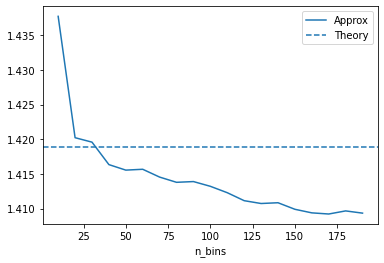

In [93]:
plt.plot(bins, ents, label="Approx")
plt.axhline(S, linestyle='--', label="Theory")
plt.xlabel("n_bins")
plt.legend()
plt.show()